# 图像特效-光源退化

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import imageio

In [2]:
src = imageio.imread('../datas/f3.jpg')

In [49]:
def get_distance(cx,cy,x,y):
    return np.sqrt((cx - x) ** 2 + (cy - y) ** 2)

def spotlight_square(src,factor=1):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    cx,cy = cols // 2,rows // 2
    max_distance = np.sqrt(cx ** 2 + cy ** 2)
    for i in range(rows):
        for j in range(cols):
            scale = 1.0 - get_distance(cx,cy,j,i) / max_distance
            for k in range(factor):
                scale = scale ** 2
            dst[i,j] = scale * srcf[i,j]
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

def spotlight_linear(src,factor=0.1):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    cx,cy = cols // 2,rows // 2
    max_distance = np.sqrt(cx ** 2 + cy ** 2)
    for i in range(rows):
        for j in range(cols):
            scale = 1.0 - get_distance(cx,cy,j,i) / max_distance
            scale = scale * factor
            dst[i,j] = scale * srcf[i,j]
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

def spotlight_cube(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    cx,cy = cols // 2,rows // 2
    max_distance = np.sqrt(cx ** 2 + cy ** 2)
    for i in range(rows):
        for j in range(cols):
            scale = 1.0 - get_distance(cx,cy,j,i) / max_distance
            scale = scale ** 3
            dst[i,j] = scale * srcf[i,j]
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [27]:
dst = spotlight_square(src,2)

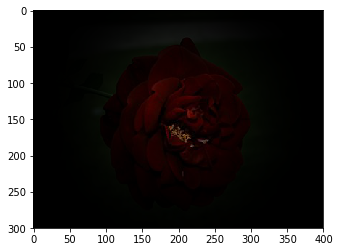

In [28]:
plt.imshow(dst)

In [46]:
dst = spotlight_linear(src,2.0)

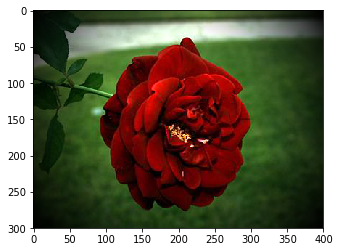

In [47]:
plt.imshow(dst)

In [50]:
dst = spotlight_cube(src)

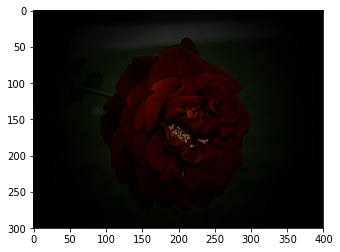

In [51]:
plt.imshow(dst)